In [378]:
from branching_sus.implementation import ConvexGraphBranching, SubsetSimulation
from branching_sus.performance_function import breitung, himmel
import matplotlib.pyplot as plt
import numpy as np


In [379]:
colors = [
    '#e66101',
    '#fdb863',
    '#b2abd2',
    '#5e3c99'
]

# Linear SuS

In [384]:
sus = SubsetSimulation(performance_function=breitung,
                       dimension=2,
                       level_size=500,
                       threshold=0,
                       level_probability=0.1,
                       seed=0,
                       verbose=False)

sus.run()

In [385]:
def breitung_class(x):
    perf = breitung(x)
    return -1 if perf<0 else 1


x_range = (-4,6)
y_range = (-4,6)
step =  0.01
function = breitung_class
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()


contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]

lss_x = contour_points[0].T[0]
lss_y = contour_points[0].T[1]
lss_z = np.array([performance_function(pt) for pt in contour_points[0]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_27804\2650117914.py:19: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


In [386]:
tick_font_size = 6
legend_font_size = 5
xy_label_pad = -4
z_label_pad = -6
z_label_size = 7
tick_pad = -1
marker_size = 30
xy_label_size = 10


lss_zorder = 2
des_zorder = 3
prev_zorder = 4
curr_zorder = 5

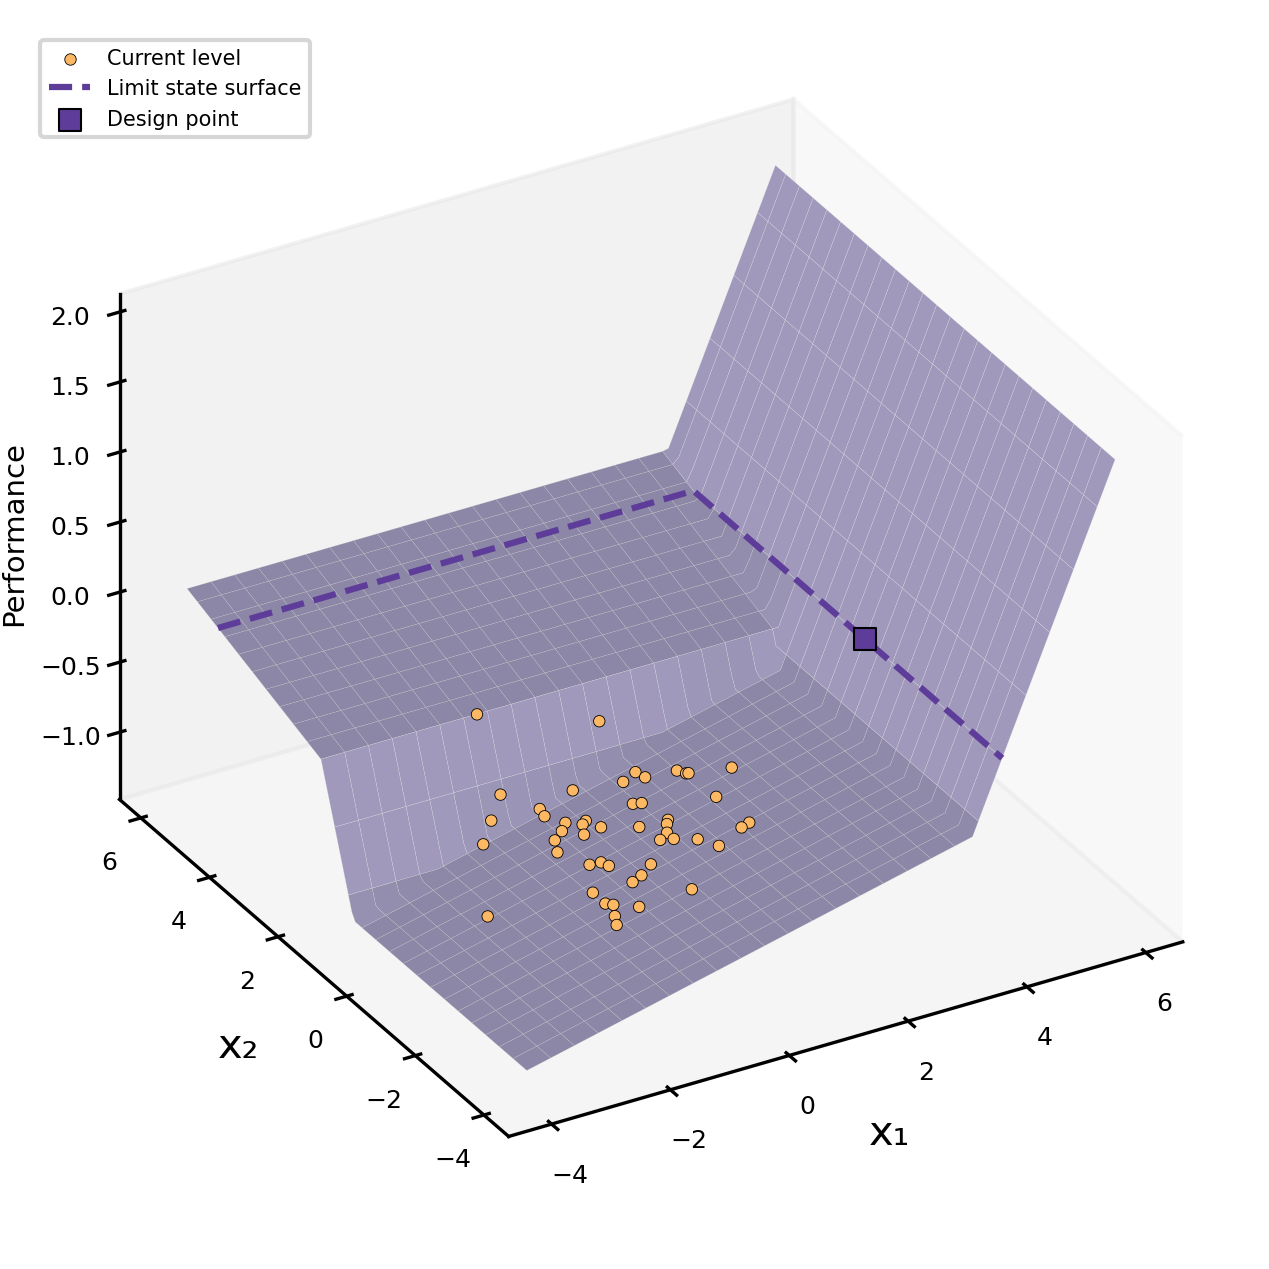

In [387]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)




current_level = 0

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad,size=xy_label_size)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad,size=xy_label_size)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


re_level = sus.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_sus_3d_1.pdf',bbox_inches='tight')

plt.show()

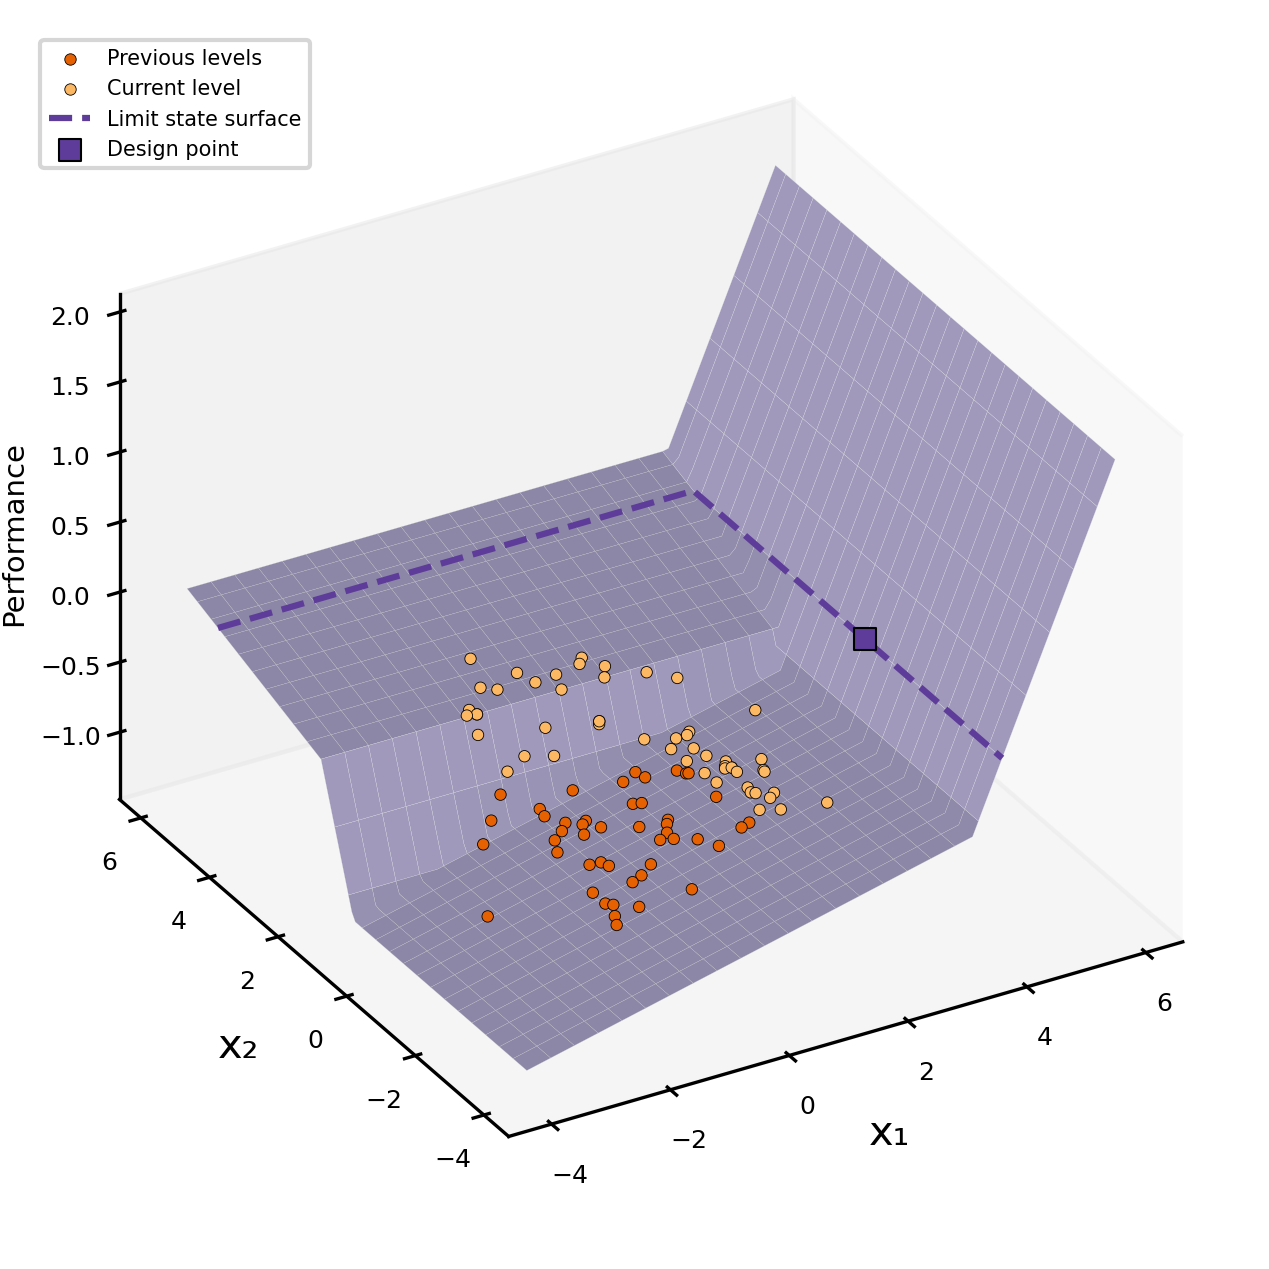

In [413]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)




current_level = 1

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad,size=xy_label_size)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad,size=xy_label_size)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [sus.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)


re_level = sus.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_sus_3d_2.pdf',bbox_inches='tight')

plt.show()

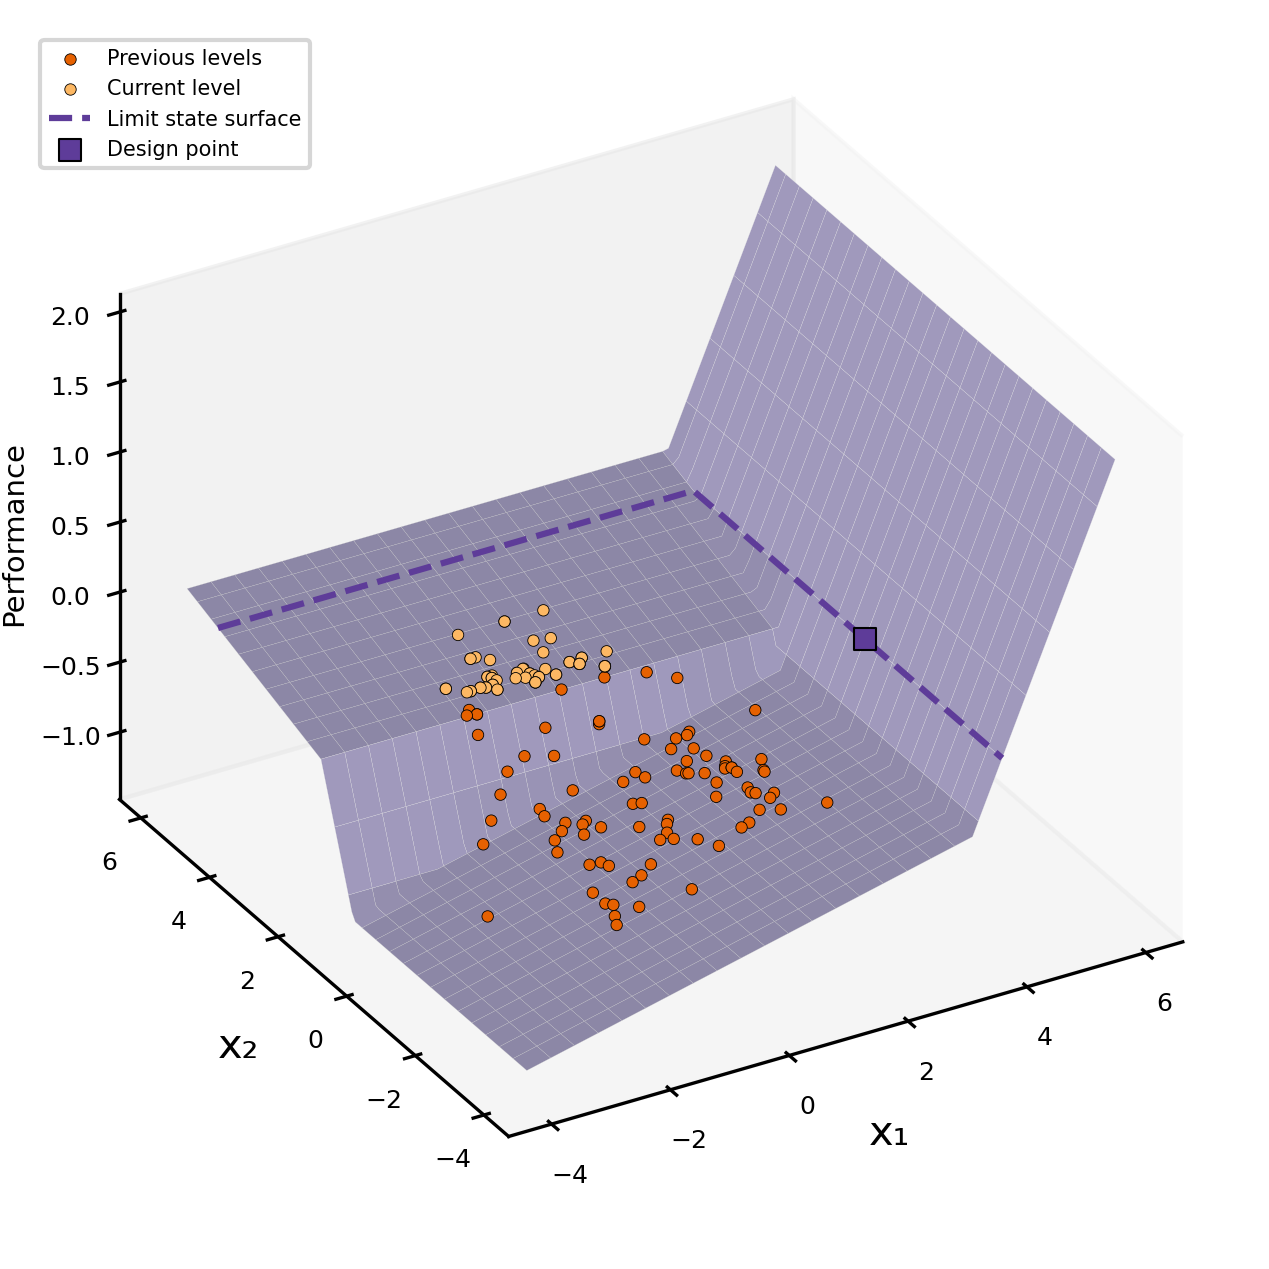

In [389]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)




current_level = 2

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad,size=xy_label_size)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad,size=xy_label_size)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [sus.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)


re_level = sus.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_sus_3d_3.pdf',bbox_inches='tight')

plt.show()

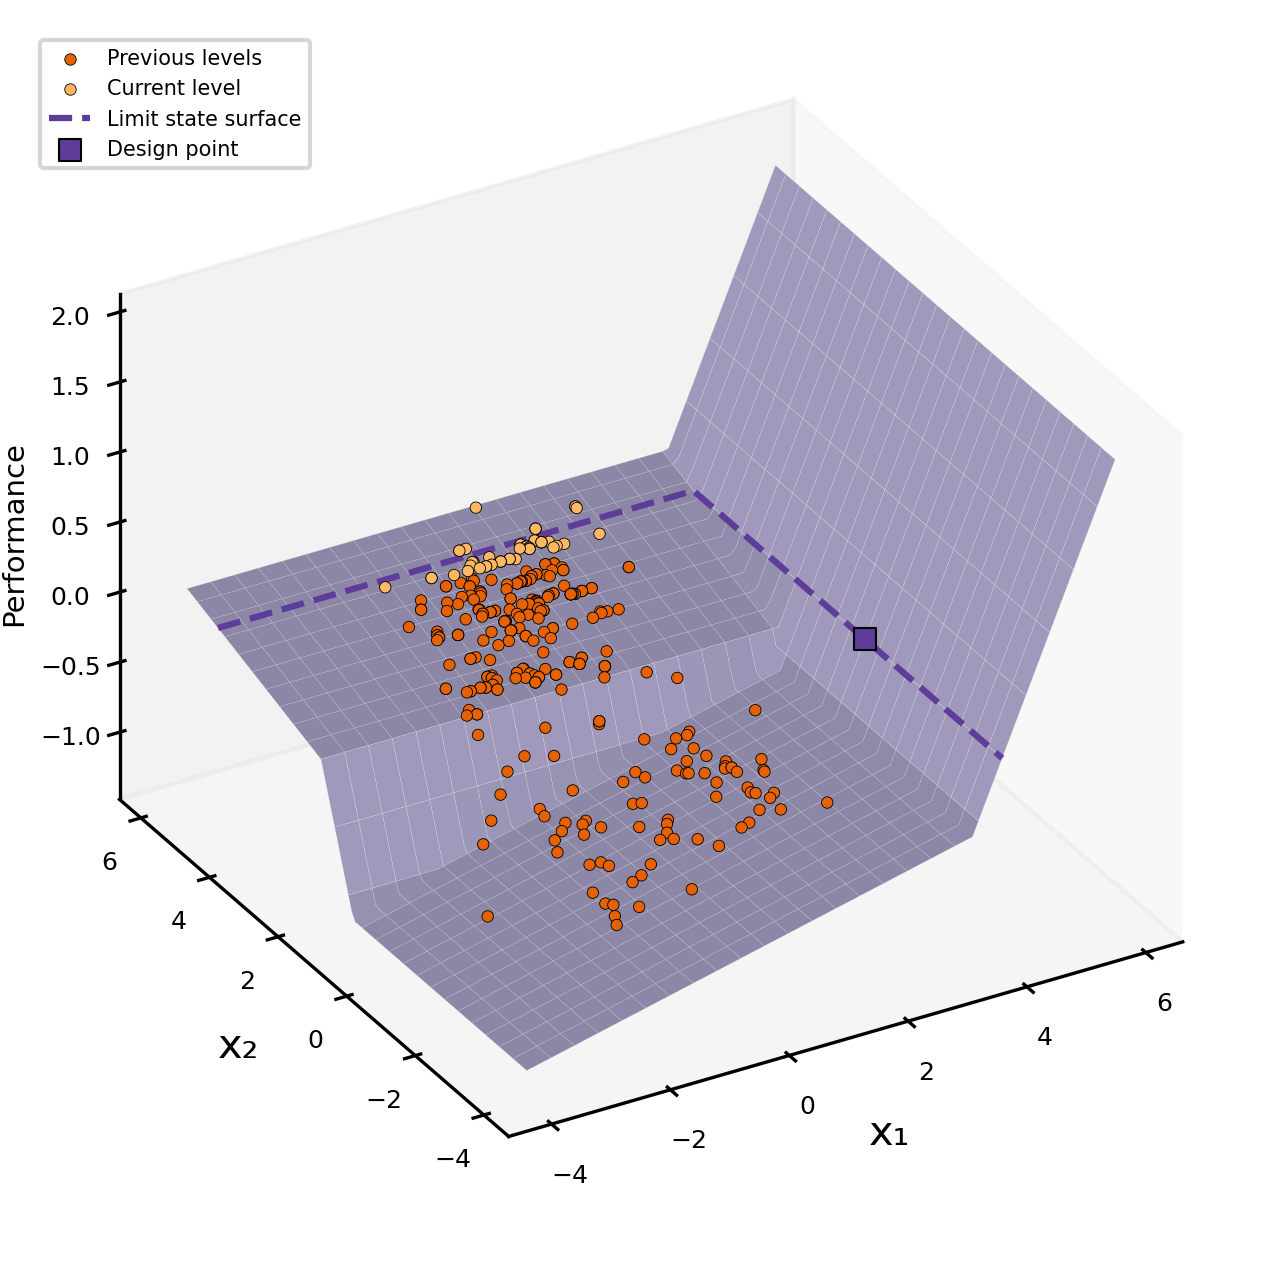

In [390]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)




current_level = 6

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad,size=xy_label_size)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad,size=xy_label_size)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [sus.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)


re_level = sus.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_sus_3d_7.pdf',bbox_inches='tight')

plt.show()

# Linear BSuS

In [391]:
bss = ConvexGraphBranching(performance_function=breitung,
                           dimension=2,
                           level_size=500,
                           threshold=0,
                           level_probability=0.1,
                           seed=3,
                           params=None,
                           convex_budget=50,
                           verbose=False)

bss.run()

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [392]:
tick_font_size = 6
legend_font_size = 5
xy_label_pad = -4
z_label_pad = -6
z_label_size = 7
tick_pad = -1
marker_size = 30
xy_label_size = 10

bound_zorer = 1
lss_zorder = 2
des_zorder = 3
prev_zorder = 4
curr_zorder = 5

In [393]:
def breitung_class(x):
    perf = breitung(x)
    return -1 if perf<0 else 1


x_range = (-4,6)
y_range = (-4,6)
step =  0.01
function = breitung_class
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()


contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]

lss_x = contour_points[0].T[0]
lss_y = contour_points[0].T[1]
lss_z = np.array([performance_function(pt) for pt in contour_points[0]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_27804\2650117914.py:19: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


In [394]:
partition_info = bss.partitioner.get_partition_information_for_level(bss.find('2'))
classifier = partition_info.classifier
performance_function = breitung

x_range = (-4,5.9)
y_range = (-4,6)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]

partition_x = contour_points[0].T[0]
partition_y = contour_points[0].T[1]
partition_z = np.array([performance_function(pt) for pt in contour_points[0]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_27804\2408326842.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


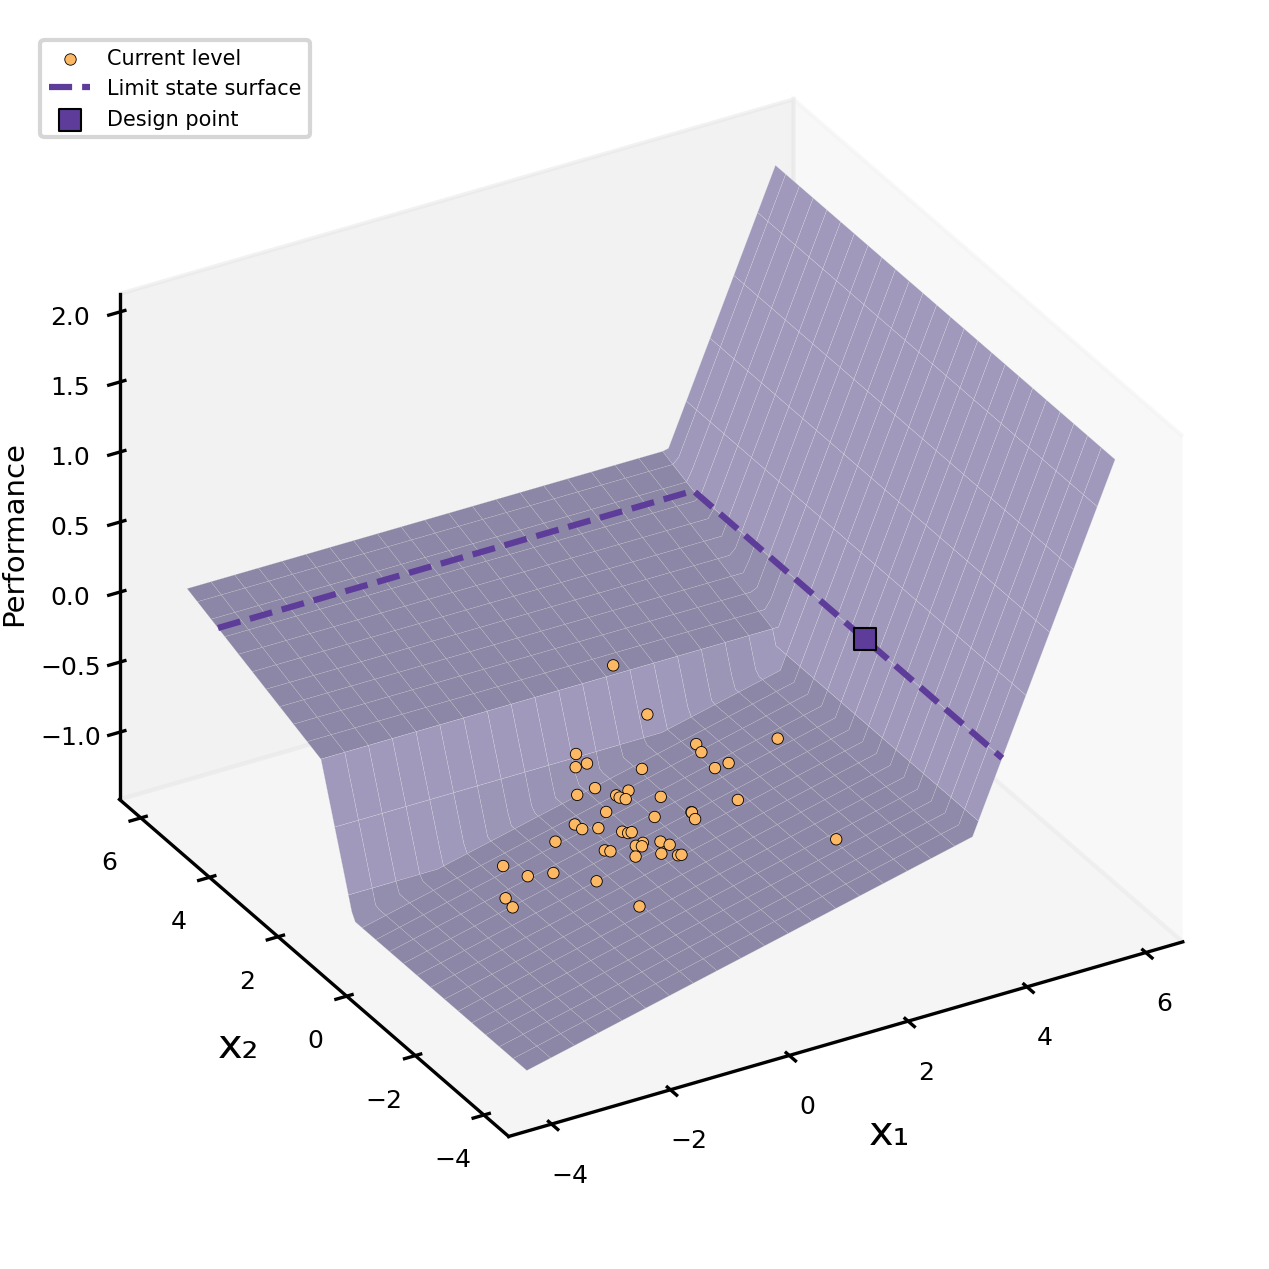

In [395]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)




current_level = 0

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size ,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)



re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)


ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )



plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_bss_3d_1.pdf',bbox_inches='tight')

plt.show()

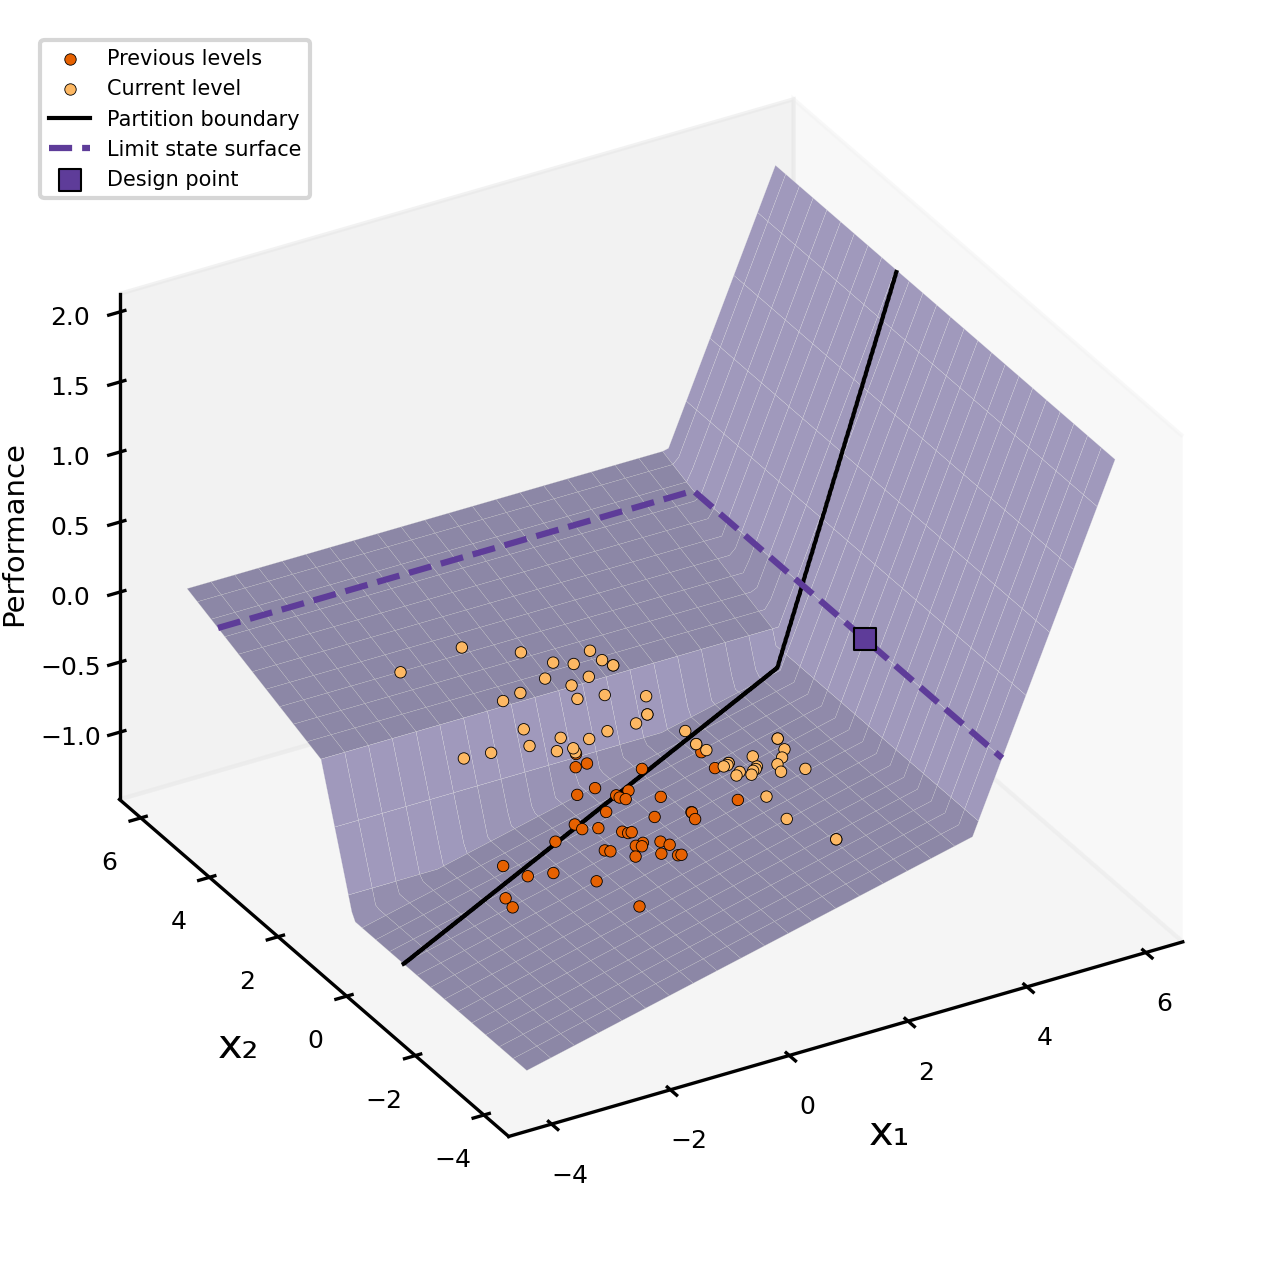

In [396]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 1

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size ,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)



re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )


ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )



plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_bss_3d_2.pdf',bbox_inches='tight')

plt.show()

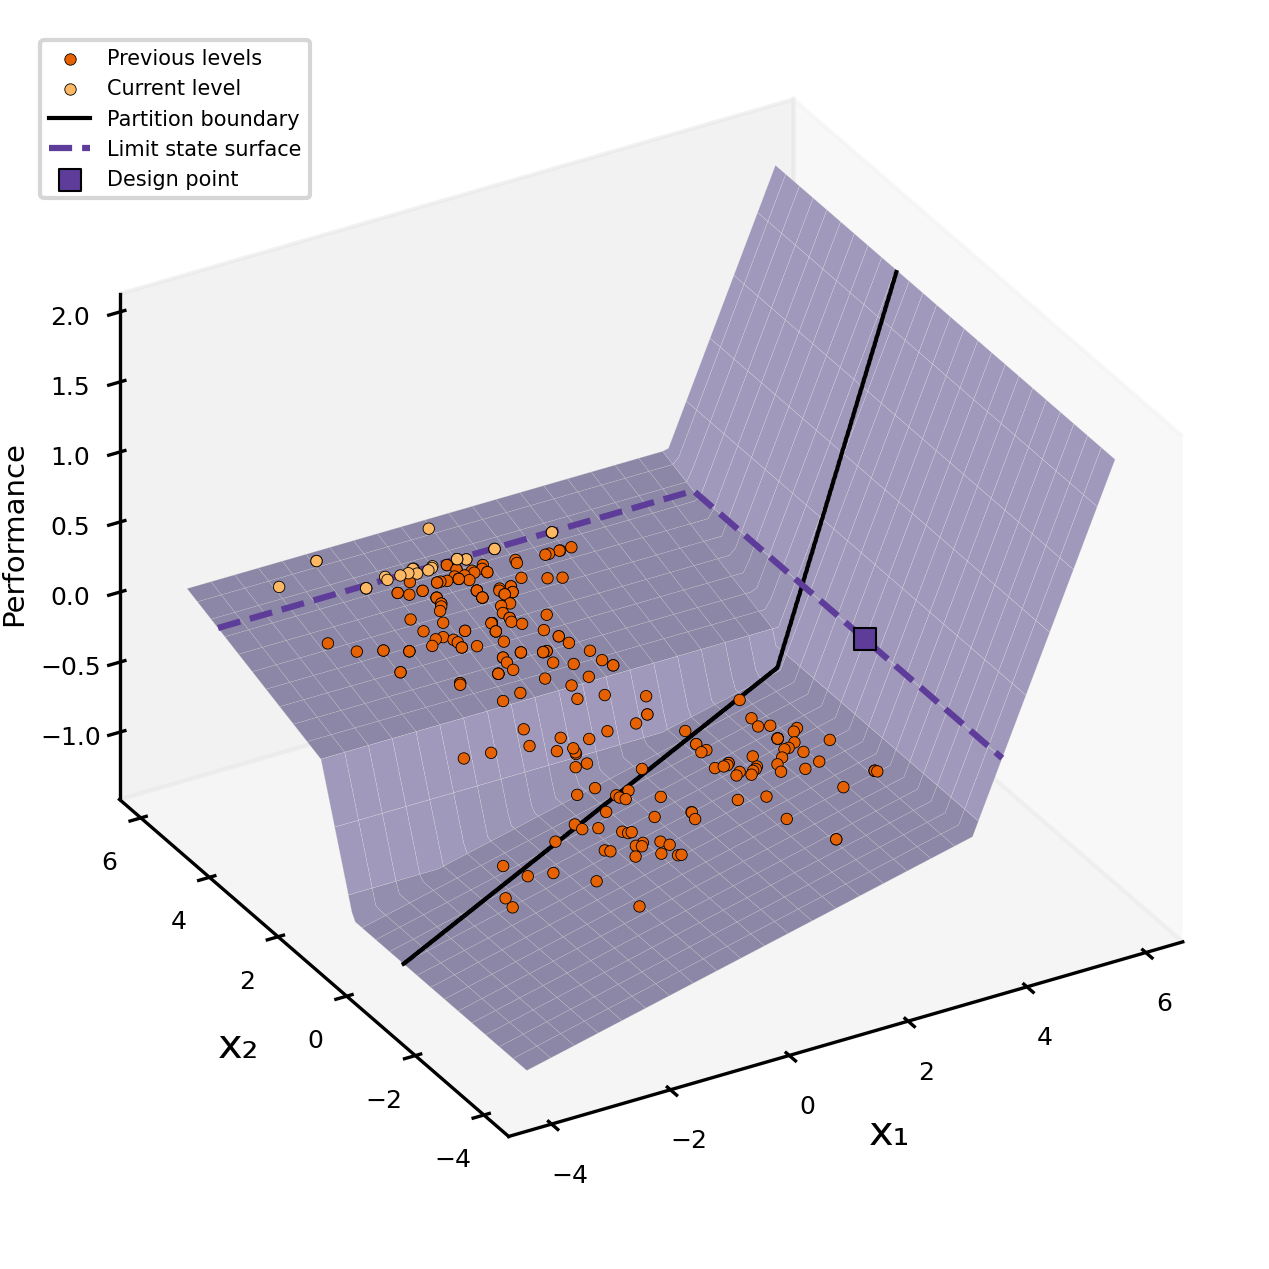

In [397]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 7

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size ,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)



re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )


ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )



plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_bss_3d_8.pdf',bbox_inches='tight')

plt.show()

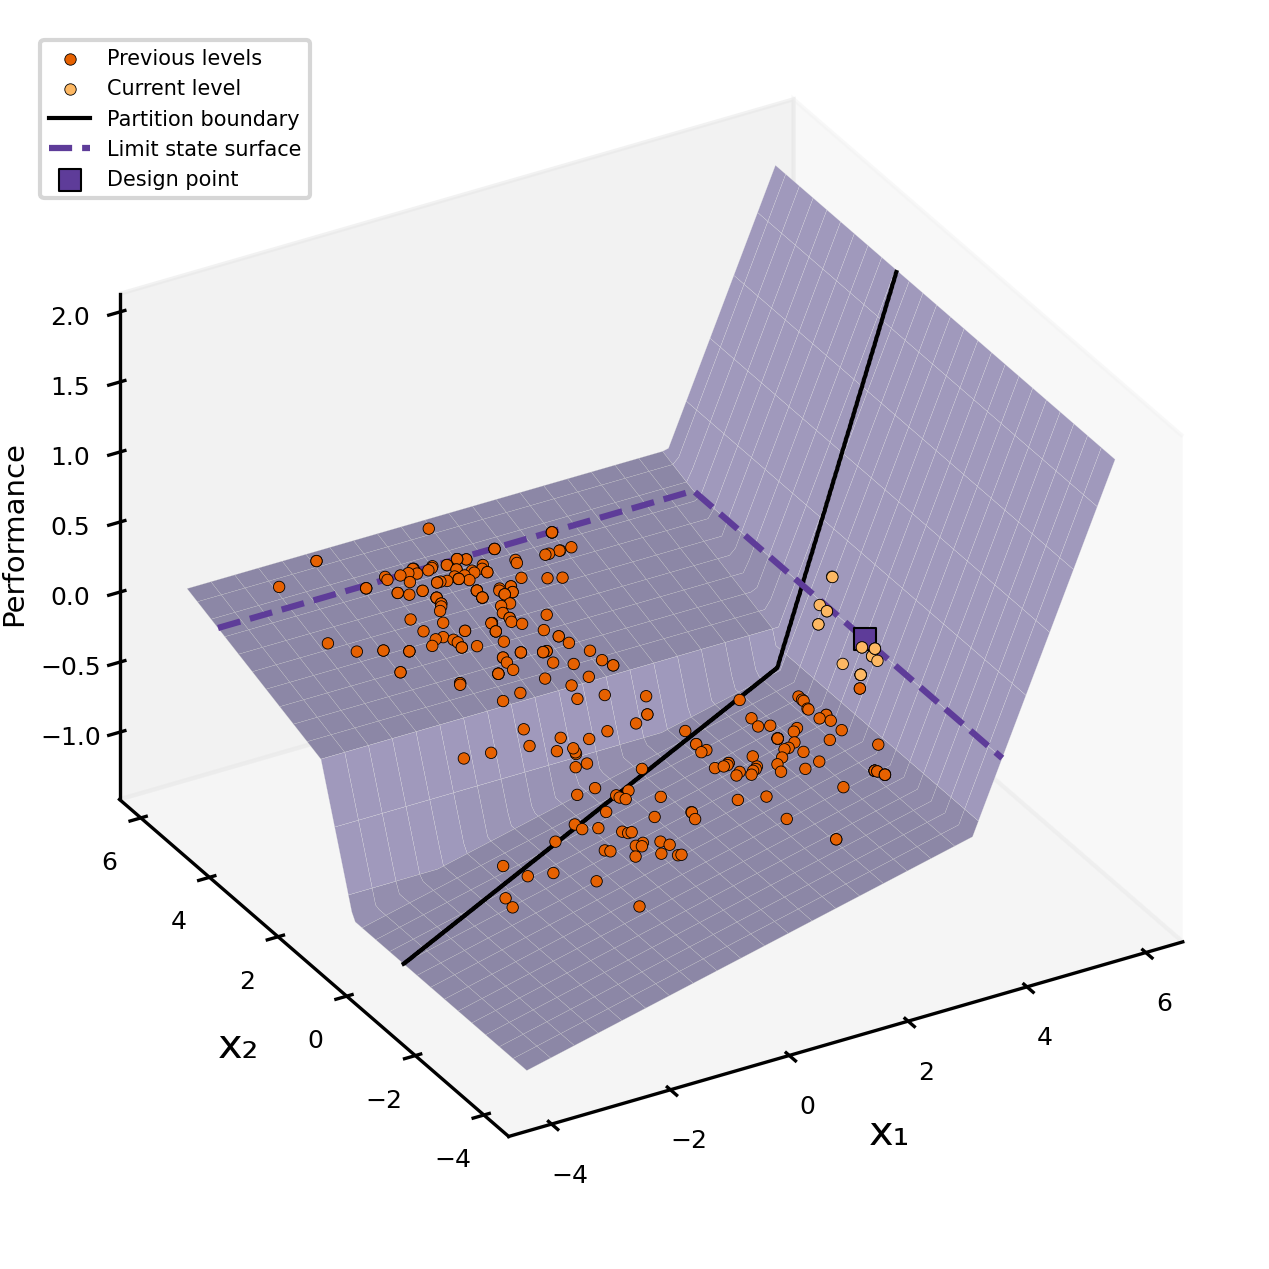

In [399]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = breitung

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-4, 6, 0.1)
y = np.arange(-4, 6, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 9

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size ,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)


sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)



re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)

ax.plot3D(partition_x,
          partition_y,
          partition_z,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )


ax.plot3D(lss_x,
          lss_y,
          lss_z,
          alpha=1,
          color=colors[3],
          linestyle = 'dashed',
          label='Limit state surface',
          zorder=lss_zorder
          )

ax.scatter(4,
           0,
           performance_function([4,0]),
           alpha=1,
           s=marker_size,
           marker = 's',
           linewidth=0.5,
           color=colors[3],
           label='Design point',
           edgecolor='black',
           zorder=des_zorder
           )



plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('linear_bss_3d_10.pdf',bbox_inches='tight')

plt.show()

# Himmel BSuS

In [400]:
bss = ConvexGraphBranching(performance_function=himmel,
                           dimension=2,
                           level_size=500,
                           threshold=np.inf,
                           level_probability=0.1,
                           seed=1,
                           params=None,
                           convex_budget=50,
                           verbose=False)

bss.run()

C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hkinn\miniconda3\envs\branching_sus\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [403]:
tick_font_size = 6
legend_font_size = 5
xy_label_pad = -4
z_label_pad = -6
z_label_size = 7
tick_pad = -1
marker_size = 30
xy_label_size = 10

bound_zorer = 1
lss_zorder = 2
des_zorder = 3
prev_zorder = 4
curr_zorder = 5

In [401]:
partition_info = bss.partitioner.get_partition_information_for_level(bss.find('2'))
classifier = partition_info.classifier
performance_function = himmel

x_range = (-5,5)
y_range = (-5,5)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


break_1 = 1150
end_1 = -14


partition_x_1 = contour_points[0][:break_1].T[0]
partition_y_1 = contour_points[0][:break_1].T[1]
partition_z_1 = np.array([performance_function(pt) for pt in contour_points[0][:break_1]])

partition_x_2 = contour_points[4].T[0]
partition_y_2 = contour_points[4].T[1]
partition_z_2 = np.array([performance_function(pt) for pt in contour_points[4]])


partition_info = bss.partitioner.get_partition_information_for_level(bss.find('6'))
classifier = partition_info.classifier
performance_function = himmel

x_range = (0,5)
y_range = (-5,5)
step =  0.01
function = classifier
x = np.arange(x_range[0], x_range[1], step)
y = np.arange(y_range[0], y_range[1], step)
xx, yy = np.meshgrid(x, y)
flat = np.vstack([xx.ravel(), yy.ravel()])
z = np.array([function(point) for point in flat.T]).reshape(xx.shape)
contour = plt.contour(xx, yy, z, levels=None,colors='black')
plt.close()

contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


break_1 = 230
end_1 = 20


partition_x_3 = contour_points[0][break_1:].T[0]
partition_y_3 = contour_points[0][break_1:].T[1]
partition_z_3 = np.array([performance_function(pt) for pt in contour_points[0][break_1:]])

C:\Users\hkinn\AppData\Local\Temp\ipykernel_27804\1161173187.py:17: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]
C:\Users\hkinn\AppData\Local\Temp\ipykernel_27804\1161173187.py:49: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = [path.vertices for level in contour.collections for path in level.get_paths()]


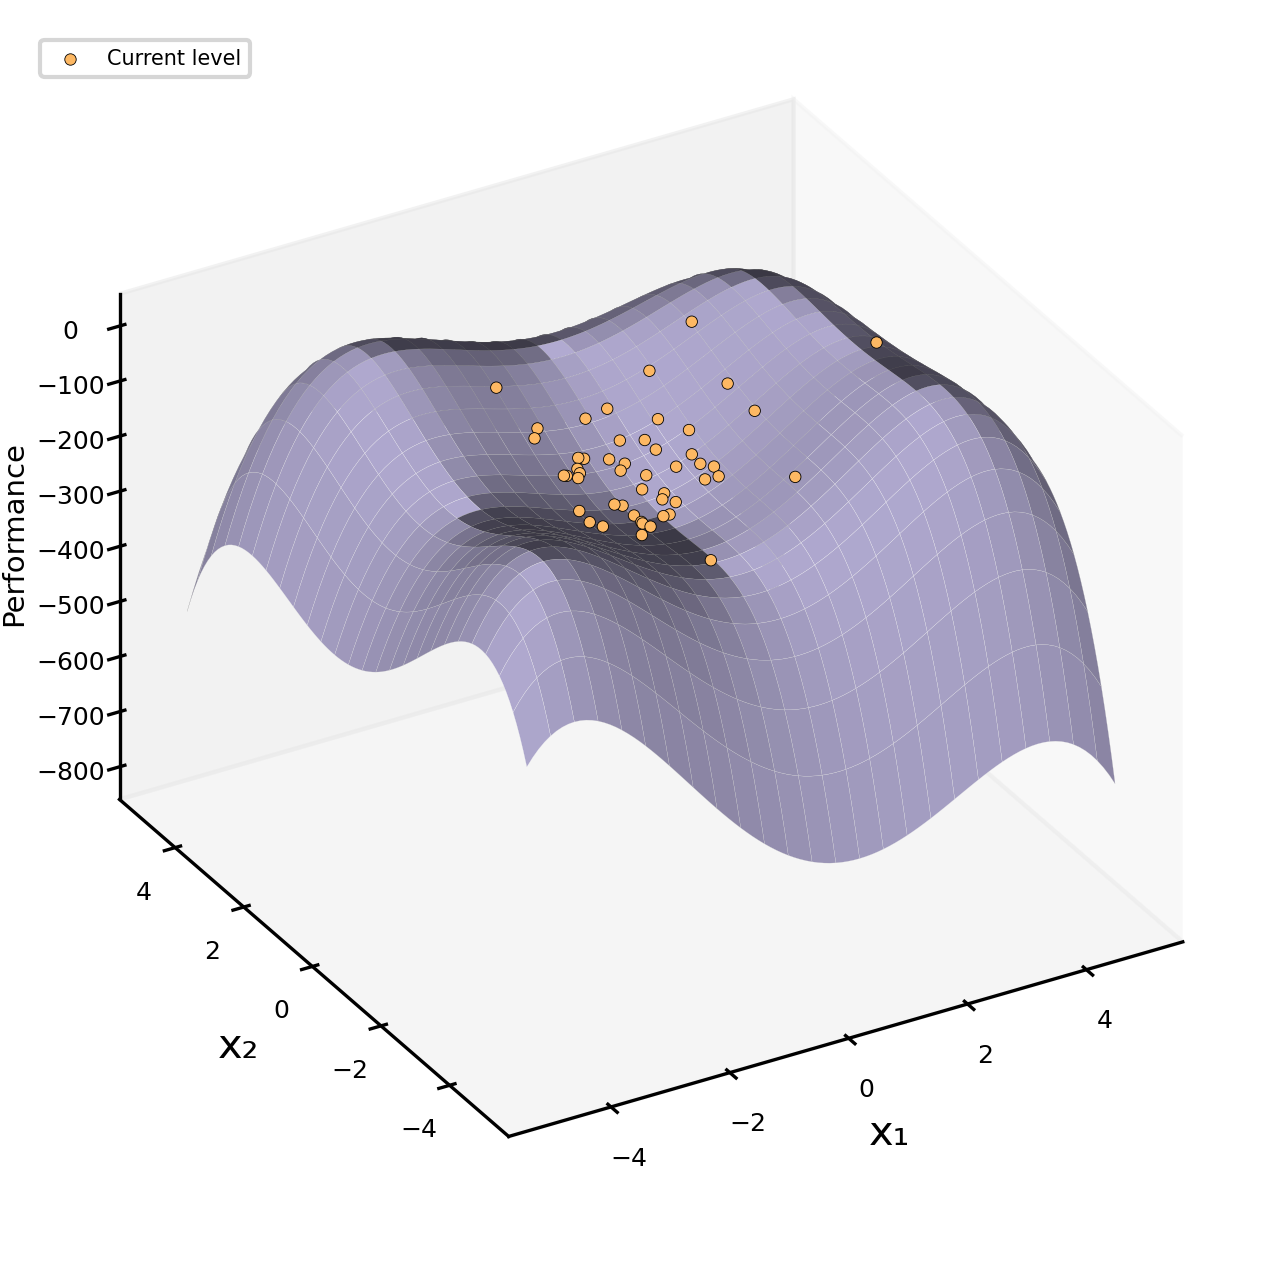

In [405]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = himmel

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 0

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)




re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)







plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('himmel_bss_3d_1.pdf',bbox_inches='tight')

plt.show()

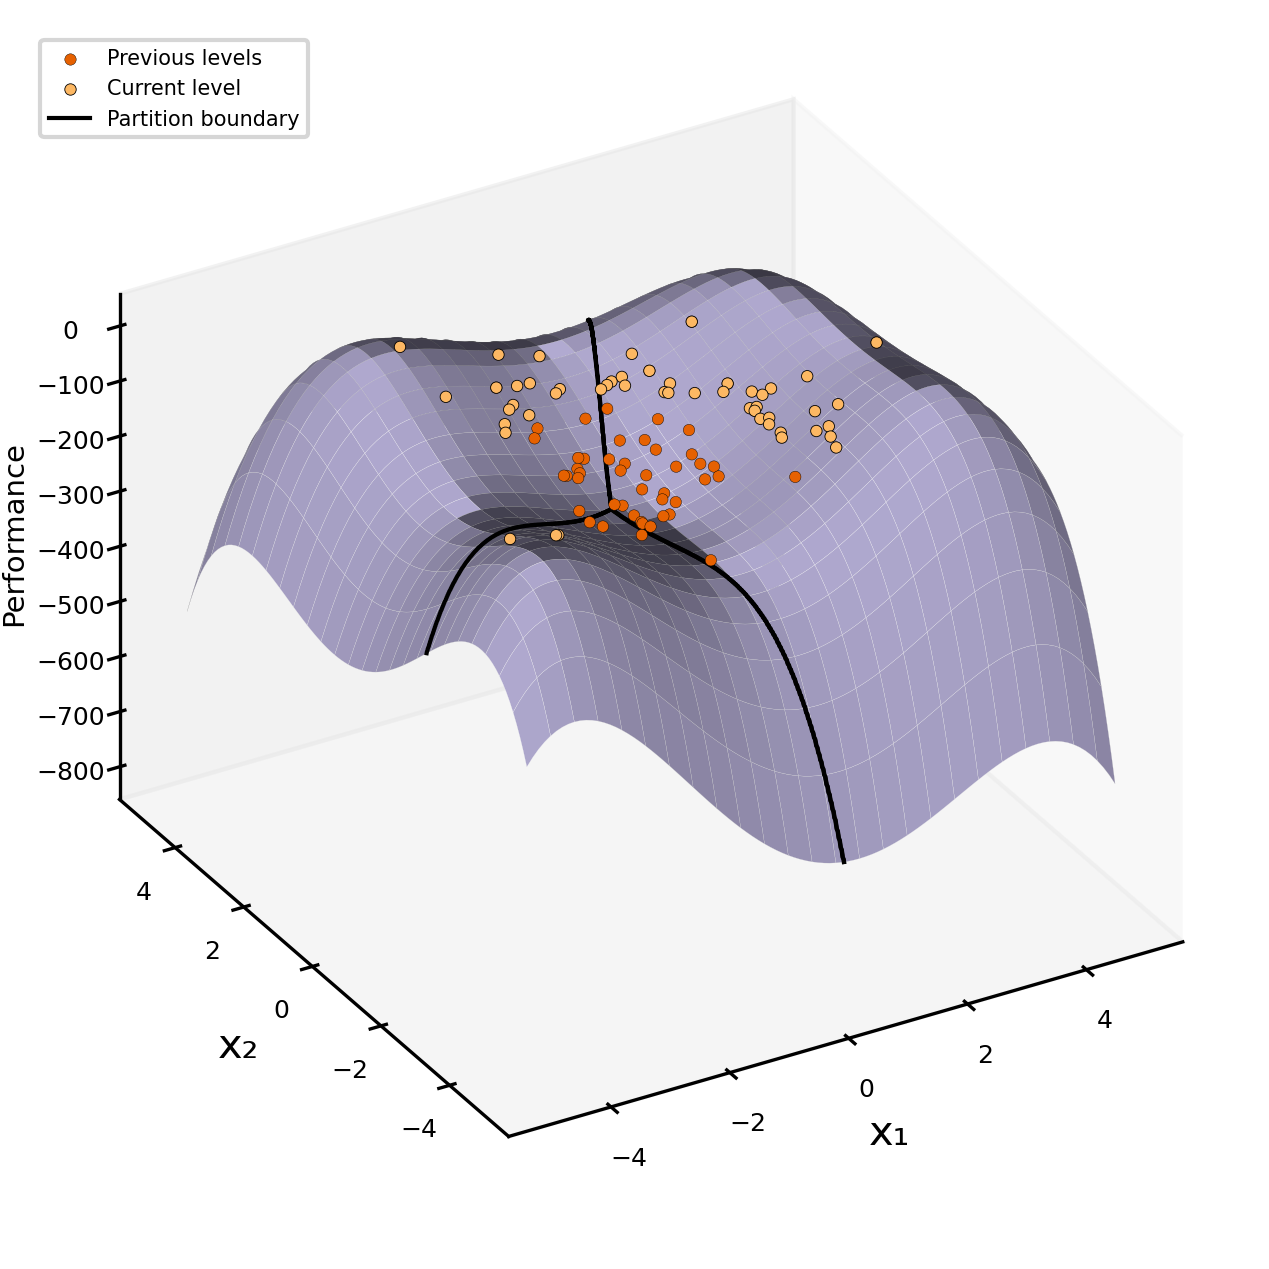

In [406]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = himmel

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 1

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)

sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.1,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)




re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)



ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )

ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          zorder=bound_zorder
          )



plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('himmel_bss_3d_2.pdf',bbox_inches='tight')

plt.show()

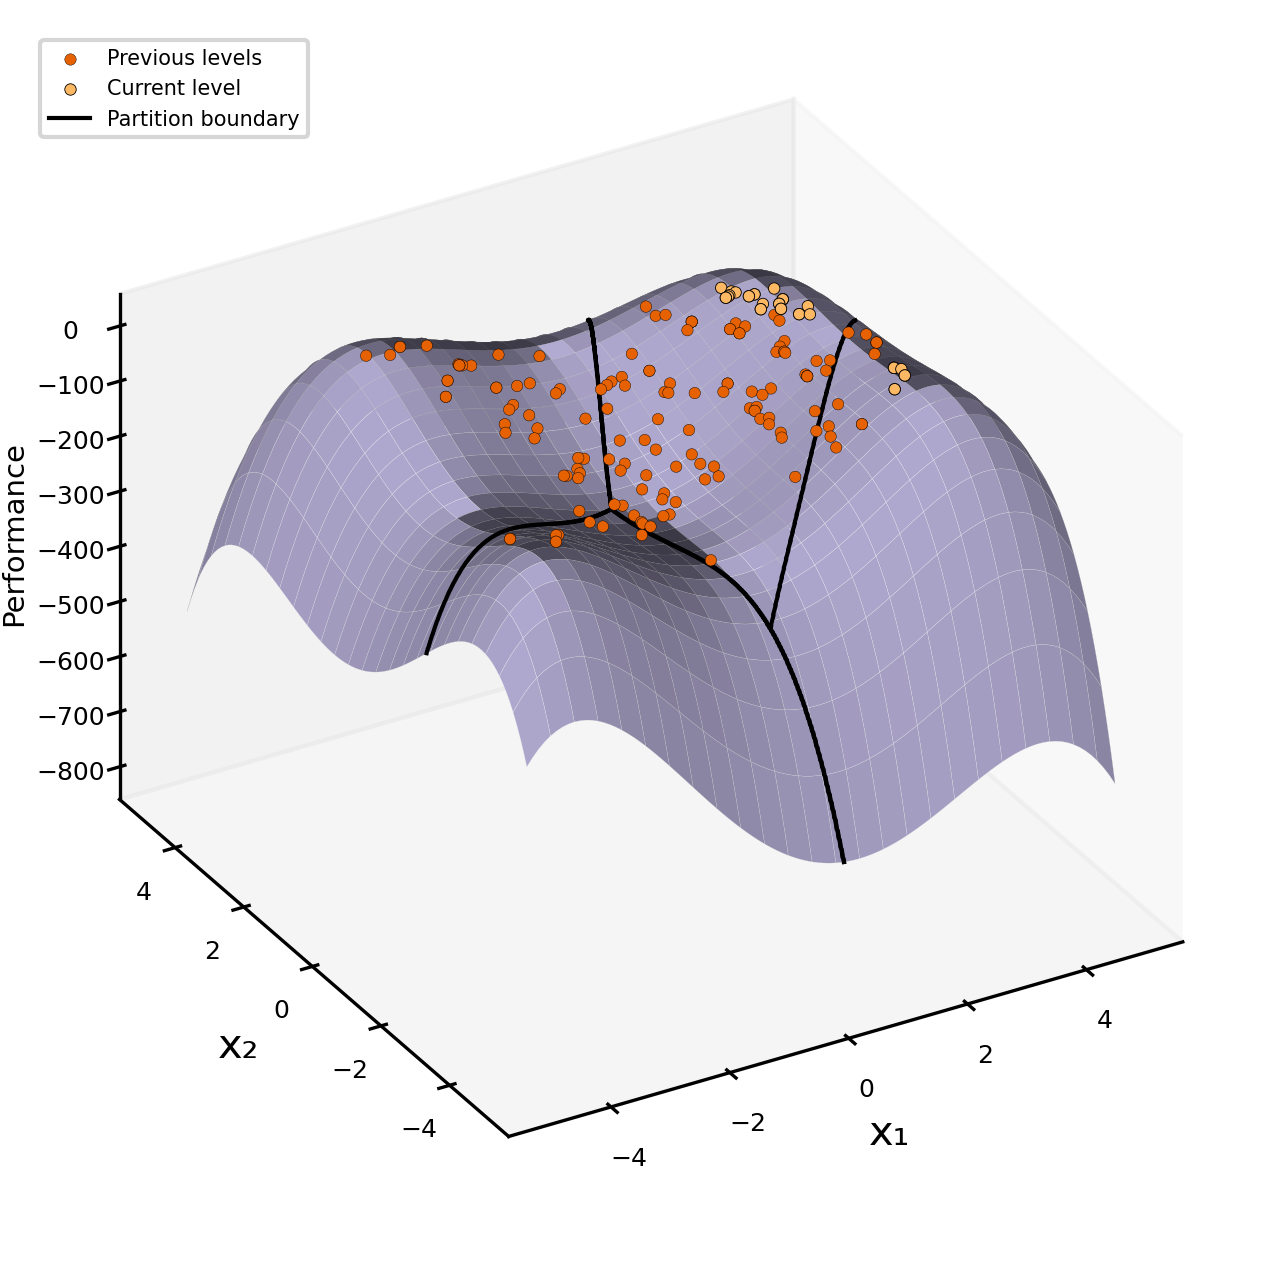

In [407]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = himmel

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 5

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)

sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.1,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)




re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)



ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )

ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          zorder=bound_zorder
          )


ax.plot3D(partition_x_3,
          partition_y_3,
          partition_z_3,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          zorder=bound_zorder
          )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('himmel_bss_3d_6.pdf',bbox_inches='tight')

plt.show()

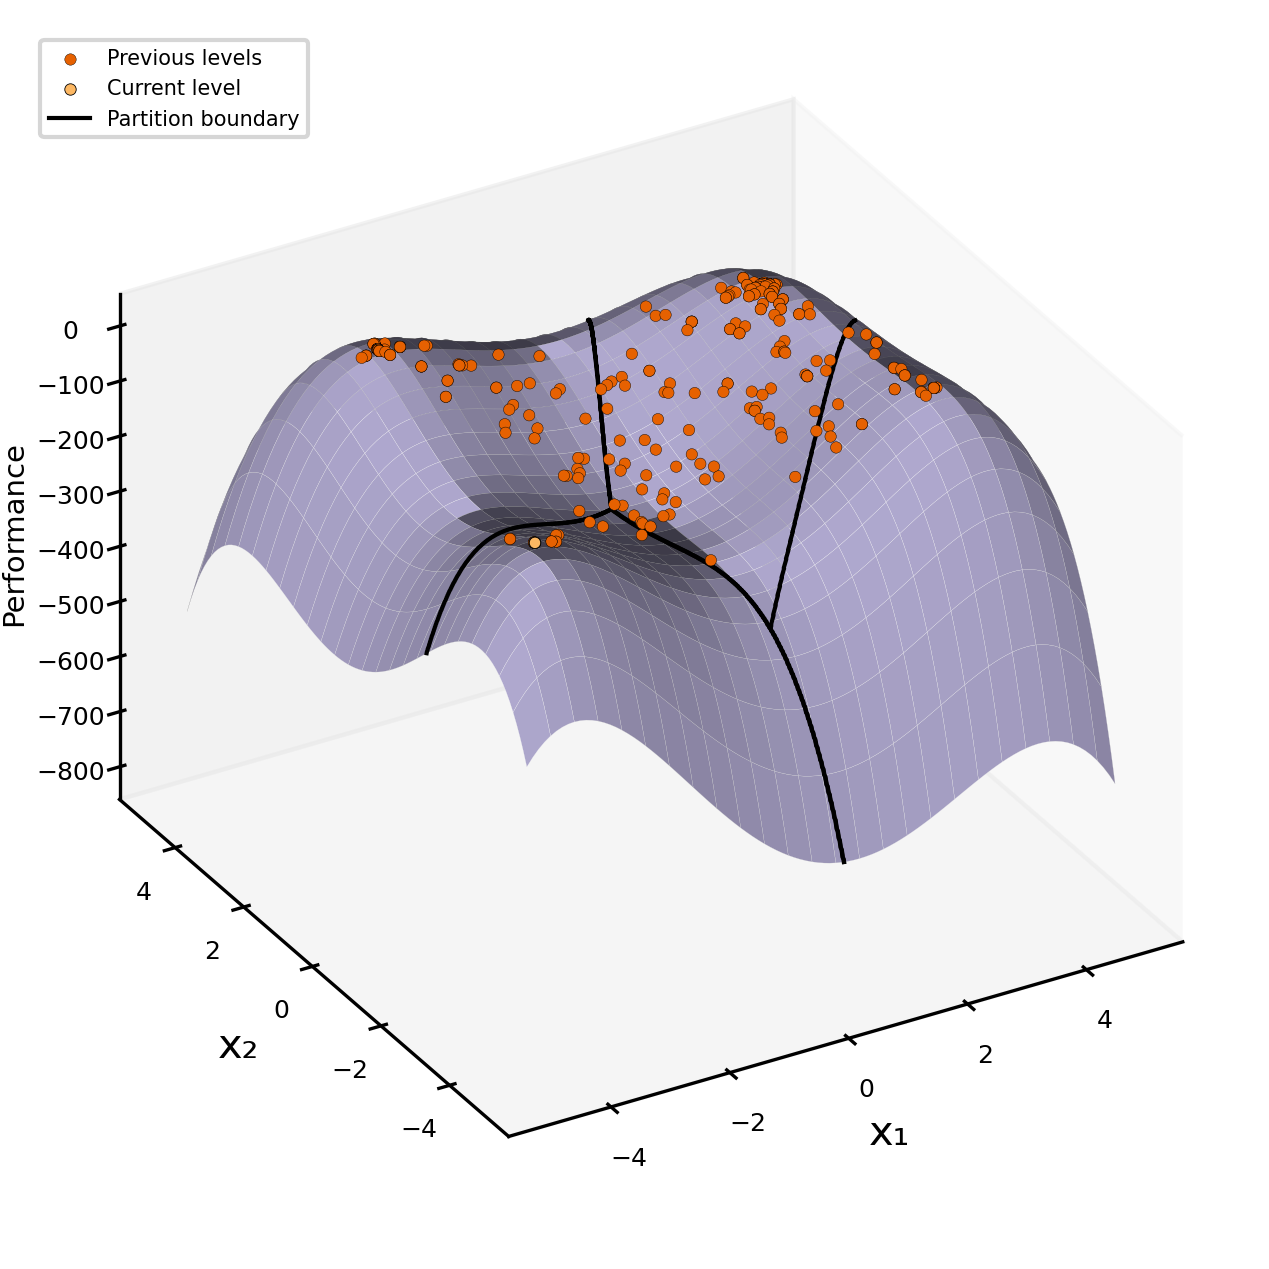

In [408]:
stride = 4
lw = 0.05
alpha = 1
alias = True
performance_function = himmel

cm_width = 19
cm_to_inch = 0.393701
figWidth = cm_width * cm_to_inch
fig_aspect_ratio = 7./10.
figHeight = figWidth * fig_aspect_ratio 
plt.figure(figsize=(figWidth, figHeight), dpi=300)

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=False)
flat = np.vstack([xx.ravel(), yy.ravel()])
zz = np.array([performance_function(point) for point in flat.T]).reshape(xx.shape)



current_level = 19

ax = plt.axes(projection='3d',computed_zorder=False)

ax.view_init(30,-120)
plt.xlabel(u'x\u2081',labelpad=xy_label_pad)
plt.ylabel(u'x\u2082',labelpad=xy_label_pad)
ax.set_proj_type('ortho')
ax.grid(False)
ax.set_zlabel('Performance',fontsize=z_label_size,rotation=90,labelpad=z_label_pad)
ax.tick_params(labelsize=tick_font_size,pad=tick_pad)

ax.plot_surface(xx,
                yy,
                zz,
                rstride=stride,
                cstride=stride,
                antialiased=alias,
                color=colors[2],
                alpha=alpha,
                edgecolors='white', lw=lw)

sample_level_list = [bss.all_levels[i].sample_list[0::10]
                    for i in range(current_level)]
re_level = [samp
            for sample_list in sample_level_list
            for samp in sample_list]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[0],
           marker='.',
           linewidth=0.1,
           edgecolor='black',
           label= 'Previous levels',
           zorder=prev_zorder)




re_level = bss.all_levels[current_level].sample_list[0::10]
array_level = [samp.array for samp in re_level]
samp_x = np.array(array_level).T[0]
samp_y = np.array(array_level).T[1]
samp_z = np.array([samp.performance for samp in re_level])
ax.scatter(samp_x,
           samp_y,
           samp_z,
           alpha=1,
           s=marker_size,
           color=colors[1],
           marker='.',
           linewidth=0.2,
           edgecolor='black',
           label= 'Current level',
           zorder=curr_zorder)



ax.plot3D(partition_x_1,
          partition_y_1,
          partition_z_1,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          label='Partition boundary',
          zorder=bound_zorder
          )

ax.plot3D(partition_x_2,
          partition_y_2,
          partition_z_2,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          zorder=bound_zorder
          )


ax.plot3D(partition_x_3,
          partition_y_3,
          partition_z_3,
          alpha=1,
          linewidth=1,
          color='black',
          linestyle = 'solid',
          zorder=bound_zorder
          )


plt.legend(fontsize = legend_font_size,
           loc='upper left')


plt.savefig('himmel_bss_3d_20.pdf',bbox_inches='tight')

plt.show()